In [1]:
R.Version()$version.string
R.Version()$nickname

[1] "R version 3.2.2 (2015-08-14)"

[1] "Fire Safety"

# Calculating the available volume inside the nose cone

In [2]:
OD 		<- 6.6*25.4e-3 	# m, outer diameter
R 		<- OD/2 		# m, outer radius
L 		<- 5*OD 		# m, length is 5x the diameter
thick 	<- 0.30*25.4e-3 # m. thickness of a sandwich wall

In [3]:
# LD Haack shape:
theta <- function(x) acos(1-2*x/L)
y <- function(x) R/sqrt(pi)*sqrt(theta(x)-sin(2*theta(x))/2)#von Karman ogive
y.in <- function(x) y(x)-thick #inner wall, if we line the whole thing with nomex

Technically, this is not the right way to calculate the inner radius, but it's close if we assume the slope of the nose is pretty flat throughout, which it is.

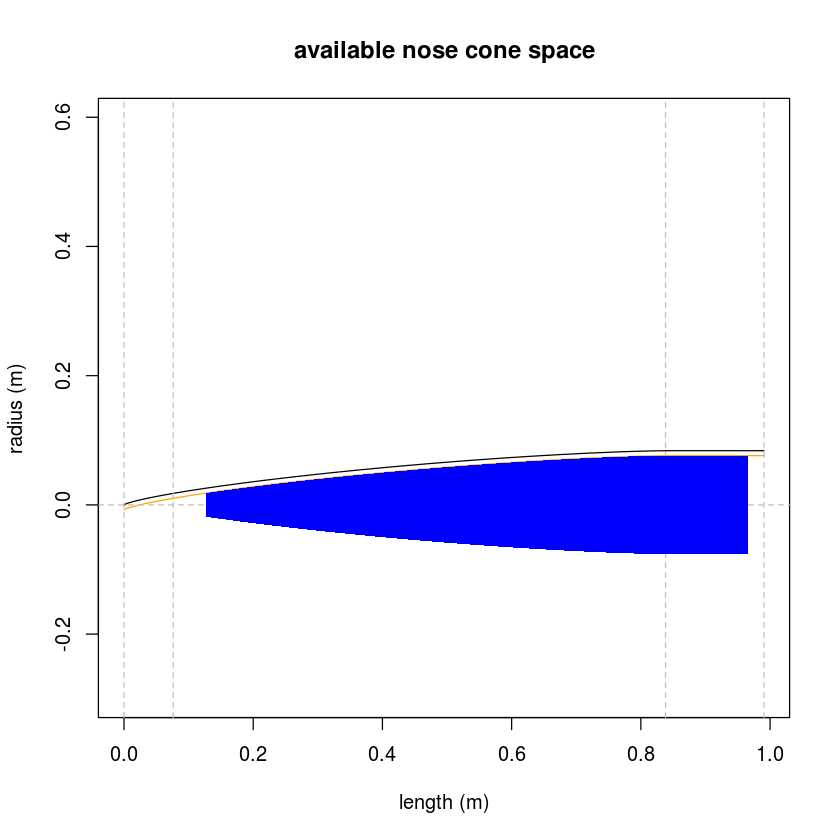

In [4]:
# visually confirm
#make a blank plot (to avoid all the warnings y() will create if we try to evaluate it beyond L)
plot(
    NA, xlim= c(0,L+6*25.4e-3), ylim= c(0,0.3), 
    asp=1, xlab="length (m)", ylab= "radius (m)",
    main= "available nose cone space"
    )

# plot the outer surface
plot(y, xlim= c(0,L), n=1e3, add=T)
lines(c(L, L+6*25.4e-3), c(R, R))

# plot the inner surface
plot(y.in, xlim= c(0,L), add=T, n=1e3, col="orange")
lines(c(L, L+6*25.4e-3), c(R, R)-thick, col="orange")

# draw lines at important spots
abline(h=0, v=c(0, 3*25.4e-3, L, L+6*25.4e-3), lty=2, col="gray")

# highlight the available volume
# The nose is truncated 3" from the theoretical tip, 
# and I'm guessing the nose ring will be ~2",
# so, let's say we have access to the space 5" behind the theoretical tip
# as well as 5" of cylindrical section behind the von Karman body
x <- seq(from=5*25.4e-3, to= L, length.out = 1e3)
polygon(
    x = c(5*25.4e-3, x, L+5*25.4e-3, L+5*25.4e-3), 
    y= c(0, y.in(x), R-thick, 0), 
    col = "blue", border= NA
    ) 
polygon(# same as before, but flipped over the x-axis
    x = c(5*25.4e-3, x, L+5*25.4e-3, L+5*25.4e-3), 
    y= -c(0, y.in(x), R-thick, 0), 
    col = "blue", border= NA
    ) 

The blue area in the above plot depicts how much space there is to work with inside the nose cone. 

In [5]:
cylFunc <- function(x) 1 # function for the profile of a cylinder

rotateVolume <- function(r, xlim, n=1e3)
{# take function r and find the volume of rotation over r(xlim) in n peices
	x <- seq(from= xlim[1], to= xlim[2], length.out = n)
	dx <- diff(x)[1]
	dv <- sapply(x, function(x) pi*r(x)^2*dx)
	dv <- na.omit(dv)
	return(sum(dv))
}

In [6]:
# calculate the volume of the nose cone
# find the volume inside a nomex-lined nose, 
# not counting the space taken up by the tip mounting
# add the volume of the cylindrical section behind that
vol <- rotateVolume(y.in, c(5*25.4e-3, L))*(1/25.4e-3)^3+
	3/25.4e-3*rotateVolume(cylFunc, c(L, L+5*25.4e-3))
cat("\nThere are", vol, "cubic inches available inside the nose cone.\n")


There are 485.2436 cubic inches available inside the nose cone.


Note that this is what's left after the nose ring (the part that the nose tip screws into) is included and some wiggle room is allowed around the walls. I assumed the nose ring would be 2" long and that the inside surface would be covered in nomex. It probably won't, but better be conservative about it, right? 

Also, I've been saying that there's 6" of cylindrical space behind the von Karman body. That's not quite true. It's 6" before being filleted. If you include the fillet, it's more like 5. Also, if you consider the shenanigans with mounting the bungee ring, you could loose or gain an inch. 